In [25]:
%matplotlib inline

In [26]:
import pandas as pd
import igraph as ig
import sys, getopt
import time
import matplotlib.pyplot as plt

In [27]:
def printUsage():
    print('Usage: python3 ig-compose.py <inputfile1> <inputfile2>')

time = 0.00016117095947265625


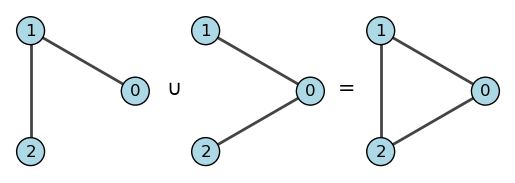

In [28]:
# def main(argv):
#     try:
#         opts, args = getopt.getopt(argv, "h") # opts = [("-h", " ")], args = [inputfile1, inputfile2]
#     except getopt.GetoptError:
#         printUsage()
#         sys.exit(2)
#     for opt, arg in opts:
#         if opt == '-h':
#             printUsage()
#             sys.exit()
#         else:
#             printUsage()
#             sys.exit(2)
#     if len(args) != 2:
#             printUsage()
#             sys.exit(2)       
#     edgefile1 = args[0]
#     edgefile2 = args[1]

edgefile1, edgefile2 = "1.edges", "2.edges"

# read edge info from edge file
# columns = ["s", "d"]
# data1 = pd.read_csv(edgefile1, comment="#", sep="\s+", names=columns)
# edges1 = []
# for row in range(len(data1)):
#     edges1.append([data1["s"][row], data1["d"][row]])
# data2 = pd.read_csv(edgefile2, comment="#", sep="\s+", names=columns)
# edges2 = []
# for row in range(len(data2)):
#     edges2.append([data2["s"][row], data2["d"][row]])

# create graph based on edge file
# DO NOT USE igraph._igraph.GraphBase, USE SUBCLASS igraph.Graph instead
# Read_Edgelist() in igraph is 0-based !!! (number vertices from 0)
G1 = ig.Graph.Read_Edgelist(edgefile1, directed=False)
G2 = ig.Graph.Read_Edgelist(edgefile2, directed=False)

start = time.time()
G0 = ig.union([G1, G2]) # G0 = G1 U G2
end = time.time()

print("time = " + str(end - start))

# write to file
edgefile0 = edgefile1.split('.edges')[0] + "." + edgefile2.split('.edges')[0] + ".edges"
df = pd.DataFrame(G0.get_edgelist())
df.to_csv(edgefile0, sep=" ", index=False, header=False)

# visulize
visual_style = {
"vertex_color": "lightblue",
"vertex_label": range(G0.vcount()),
"vertex_size": 0.4,
}

fig, axs = plt.subplots(1, 3)
ig.plot(
    G1,
    layout=G1.layout("circle"),
    target=axs[0],
    **visual_style,
)
ig.plot(
    G2,
    layout=G1.layout("circle"),
    target=axs[1],
    **visual_style,
)
ig.plot(
    G0,
    layout=G1.layout("circle"),
    target=axs[2],
    **visual_style,
)
fig.text(0.38, 0.5, '$\cup$', fontsize=15, ha='center', va='center')
fig.text(0.65, 0.5, '=', fontsize=15, ha='center', va='center')
plt.show()

In [29]:
# if __name__ == "__main__":
#    main(sys.argv[1:])  